# Credit Card Fraud Detection.

* Machine Learning India AI Challenge

**The aim of this challenge is to classify credit card transaction as fraudulent or not.
Difficulty**


## Welcome to Machine Learning India AI Challenge!

Machine Learning India is organizing an AI Challenge for all the beginners in data science. This challenge provides an opportunity for all the data scientists to learn, compete and showcase to your skills at national level. The dataset consists of Credit Card Transactions that need to be classified into fraudulent and non-fraudulent transactions. This challenge has applications in domain of risk analysis, insurance claims, loan approvals and other economic fronts.

The provided dataset has following 3 files:

    TRAIN.csv (contains training data)
    TEST.csv (test data for prediction)
    sample_submission.csv (an example of submission file)

The TRAIN.csv has 31 attributes, 30 training and 1 target attribute (Class). "0" represents non-fraudulent transactions and "1" represents fraudulent transactions. Attributes V1...V28 are anonymous so that the internal details may be kept hidden.

Please refer to the Submission Guidelines for the final format of the submission.

# Importing necessary libraries

In [460]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [461]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [462]:
test.drop('Index',axis = 1,inplace = True)
train.drop('Index',axis = 1,inplace = True)

In [463]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284455 non-null  float64
 1   V2      284455 non-null  float64
 2   V3      284455 non-null  float64
 3   V4      284455 non-null  float64
 4   V5      284455 non-null  float64
 5   V6      284455 non-null  float64
 6   V7      284455 non-null  float64
 7   V8      284455 non-null  float64
 8   V9      284455 non-null  float64
 9   V10     284455 non-null  float64
 10  V11     284455 non-null  float64
 11  V12     284455 non-null  float64
 12  V13     284455 non-null  float64
 13  V14     284455 non-null  float64
 14  V15     284455 non-null  float64
 15  V16     284455 non-null  float64
 16  V17     284455 non-null  float64
 17  V18     284455 non-null  float64
 18  V19     284455 non-null  float64
 19  V20     284455 non-null  float64
 20  V21     284455 non-null  float64
 21  V22     28

In [464]:
train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [465]:
train.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [466]:
# Univariate Analysis
#Num vs Num
X = train.drop('Class',axis = 1)

Since we have enough datapoints in our dataset we will try to balance the dataset unsing undersampling

In [467]:
fraud = train[train['Class']==1]
nofraud = train[train['Class']==0].sample(500,random_state = 434)
train_s = pd.DataFrame(np.vstack([fraud,nofraud]),columns = train.columns)

In [468]:
train_s.shape

(940, 30)

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


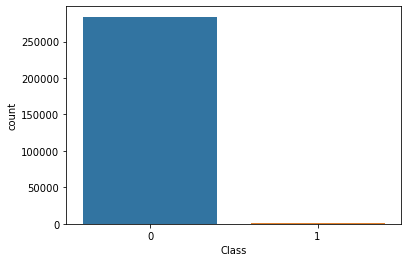

In [469]:
sns.countplot(train.Class)
plt.show()

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


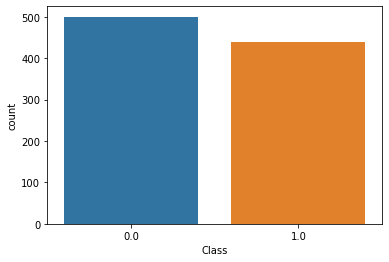

In [470]:
sns.countplot(train_s.Class)
plt.show()

In [471]:
train_s['Class'].value_counts(normalize = True)

0.0    0.531915
1.0    0.468085
Name: Class, dtype: float64

60% disbalance is ok according to me and also according to what I have read from various sources.

Now the dataset is balanced

# Let us try to create a simple logistic regression model

In [472]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [473]:
X = train_s.drop('Class',axis = 1)
y = train_s['Class']

In [474]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [475]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 488)

In [476]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9574468085106383

# Using a simple logistic regression model our dataset seems to be doing extremely well. 

Let us create a confusion matrix to better analyze our model

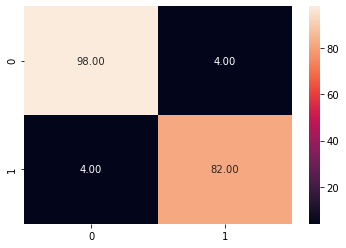

In [477]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt  ='.2f')
plt.show()

As we can see from the confusion matrix our model seems to be giving very high true positive and true negative values

In [478]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[1][0]+cm[0][1])
precision = cm[0][0]/(cm[0][0]+cm[1][0])
recall = cm[0][0]/(cm[0][0]+cm[0][1])

In [479]:
print("Accuracy:{}\nPrecision:{}\nRecall:{}".format(accuracy,precision,recall))

Accuracy:0.9574468085106383
Precision:0.9607843137254902
Recall:0.9607843137254902


Our model seems to have lower recall which means false positive rate is higher which is a good thing. This means that our model is more caucious before providing credit cards to people.

# Let us try another classification algorithm

In [480]:
from sklearn.neighbors import KNeighborsClassifier

In [481]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9414893617021277

###### Let us use the elbow method to determine optimum number of classes

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


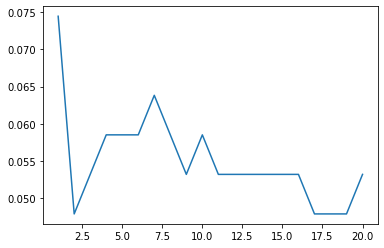

In [482]:
sc = []
classes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in classes:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    sc.append(np.mean(y_pred != y_test))
sns.lineplot(classes,sc)

In [483]:
n = 2
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9521276595744681

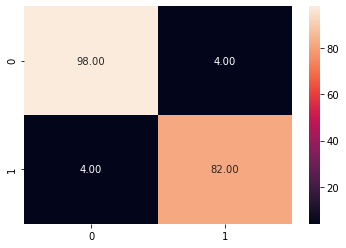

In [484]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt  ='.2f')
plt.show()

knn performs similar to logistic regression. But if we look at accuracy, knn seems to have a higher accuracy than logisticregression

# Let us try with Decision Tree classifier

In [485]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [486]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.9148936170212766

Without any hyperparameter tuning our model seems to do worse than the linear regression model. Let us try to find the best parameters for the decision tree using grid search cross validation

In [487]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [488]:
grid_search = GridSearchCV(estimator=dtree,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [489]:
# grid_search.fit(X_train,y_train)

In [490]:
# best_parameters = grid_search.best_params_
# print(best_parameters)

In [491]:
# grid_search.best_score_

In [492]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_leaf= 6, min_samples_split= 3, splitter= 'random',random_state = 4355)
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.9308510638297872

# Let us try bagging

In [493]:
from sklearn.ensemble import BaggingClassifier

In [494]:
X = train.drop('Class',axis = 1)
y = train['Class']
X = ss.fit_transform(X)

In [495]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=11, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 

In [496]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9468085106382979

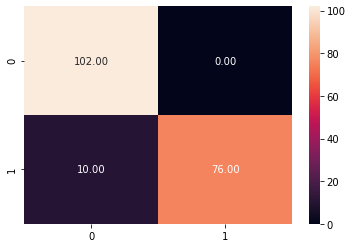

In [497]:
y_pred = bag_knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt  ='.2f')
plt.show()

In [498]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=False, random_state=3) 

In [499]:
pasting_knn.fit(X_train, y_train)
pasting_knn.score(X_test, y_test)

0.9468085106382979

# Random Forest classifier

In [500]:
from sklearn.ensemble import RandomForestClassifier

In [501]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 28,
 max_features = None,
 min_samples_leaf = 6,
 min_samples_split= 3,
 n_estimators = 11
,random_state=6,bootstrap = True)

In [502]:
rand_clf.fit(X_train,y_train)
rand_clf.score(X_test,y_test)

0.9414893617021277

# After trying various algorithms I feel that the simplest logistic regression model seems to be doing the best in our case.

# Creating the csv submission file

In [503]:
final = pd.DataFrame(lr.predict(test),columns = ['Class']).reset_index()
final['Class'] = final['Class'].astype(int)
final.to_csv('submissionreg.csv',index = False)

In [504]:
finalknn = pd.DataFrame(knn.predict(test),columns = ['Class']).reset_index()
finalknn['Class'] = finalknn['Class'].astype(int)
finalknn.to_csv('submissionknn.csv',index = False)

In [505]:
finaldtree = pd.DataFrame(dtree.predict(test),columns = ['Class']).reset_index()
finaldtree['Class'] = finaldtree['Class'].astype(int)
finaldtree.to_csv('submissiondtree.csv',index = False)

In [506]:
finalbag = pd.DataFrame(bag_knn.predict(test),columns = ['Class']).reset_index()
finalbag['Class'] = finalbag['Class'].astype(int)
finalbag.to_csv('submissionbag.csv',index = False)

In [507]:
finalrand = pd.DataFrame(rand_clf.predict(test),columns = ['Class']).reset_index()
finalrand['Class'] = finalrand['Class'].astype(int)
finalrand.to_csv('submissionrand.csv',index = False)

# Lets handle disbalance first and see

In [670]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')
test.drop('Index',axis = 1,inplace = True)
train.drop('Index',axis = 1,inplace = True)

In [671]:
train[train['Class']==1]
nofraud = train[train['Class']==0].sample(500,random_state = 556)
train = pd.DataFrame(np.vstack((nofraud,fraud)),columns = train.columns)
X = train.drop(['Class'],axis = 1)
y = train['Class']
X_scaled = ss.fit_transform(X)


In [672]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
#let's check the values
vif[vif['vif']>10]['Features'].values

array(['V1', 'V2', 'V3', 'V5', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17',
       'V18'], dtype=object)

In [673]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# o = ols("Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount",data = train).fit()
# an = sm.stats.anova_lm(o)
# acceptnull = an.loc[:,'PR(>F)'][an.loc[:,'PR(>F)']>0.05]
# acceptnull.index

In [678]:
X = train.drop(['V1', 'V2', 'V3', 'V5', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17',
       'V18','Class'],axis = 1)
test = test.drop(['V1', 'V2', 'V3', 'V5', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17',
       'V18'],axis = 1)
y = train['Class']
X_scaled = ss.fit_transform(X)
test_scaled = ss.fit_transform(test)

KeyError: "['V5' 'V7' 'V10' 'V12' 'V14' 'V16' 'V17' 'V18'] not found in axis"

In [679]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 544)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9468085106382979


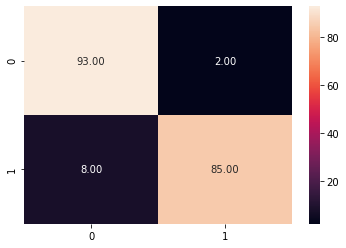

In [680]:
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt  ='.2f')
plt.show()

In [681]:
lr.predict(test_scaled)

array([0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0.